## Research Work

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import re
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import wordnet as wn
nouns = {x.name().split('.', 1)[0] for x in wn.all_synsets('n')}

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [5]:
data_train = pd.read_json('../../Dataset/Random Acts Of Pizza/train.json')
data_train['data_type'] = 'train'
y = data_train.pop('requester_received_pizza')
data_train.head(2)

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,...,[],0,1,0,1,None,nickylvst,1317852607,1317849007,train
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,...,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1332652424,1332648824,train


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4039
Data columns (total 32 columns):
giver_username_if_known                                 4040 non-null object
number_of_downvotes_of_request_at_retrieval             4040 non-null int64
number_of_upvotes_of_request_at_retrieval               4040 non-null int64
post_was_edited                                         4040 non-null int64
request_id                                              4040 non-null object
request_number_of_comments_at_retrieval                 4040 non-null int64
request_text                                            4040 non-null object
request_text_edit_aware                                 4040 non-null object
request_title                                           4040 non-null object
requester_account_age_in_days_at_request                4040 non-null float64
requester_account_age_in_days_at_retrieval              4040 non-null float64
requester_days_since_first_post_on_raop_at_reque

In [7]:
data_test = pd.read_json('../../Dataset/Random Acts Of Pizza/test.json')
data_test['data_type'] = 'test'
data_test.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type
0,N/A,t3_i8iy4,Hey all! It's about 95 degrees here and our ki...,[request] pregger gf 95 degree house and no fo...,42.083866,0.0,57,0,10,0,16,"[AskReddit, COents, Denver, DenverBroncos, Lib...",364,840,j_like,1308963419,1308959819,test
1,N/A,t3_1mfqi0,I didn't know a place like this exists! \n\nI ...,"[Request] Lost my job day after labour day, st...",223.784537,0.0,145,0,36,0,29,"[Android, AskReddit, GrandTheftAutoV, IAmA, Mi...",516,1448,0110110101101100,1379263523,1379259923,test


In [8]:
not_present = []
for i in data_train.columns:
    if i not in data_test.columns:
        not_present.append(i)
data_train.drop(labels=not_present,axis=1,inplace=True)

In [9]:
## Combining the training and testing data

data = pd.concat([data_train,data_test],ignore_index=True)
data_copy = data.copy()
data.shape

(5671, 18)

In [10]:
data.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,0,[],0,0,nickylvst,1317852607,1317849007,train
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,12,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,train


In [11]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck <L.J.Buitinck@uva.nl>
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF

n_samples = 2000
n_features = 1000
n_topics = 20
n_top_words = 20

def applyNMF(data_samples):
    print("Extracting tf-idf features for NMF...")
    tfidf_vectorizer = TfidfVectorizer(max_df=1.0,min_df=1,stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(data_samples)
    print("Fitting the NMF model with tf-idf features,"
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
    nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
    return nmf.transform(tfidf)

In [12]:
topics = applyNMF(data['request_text_edit_aware'])
print(topics.shape)

Extracting tf-idf features for NMF...
Fitting the NMF model with tf-idf features,n_samples=2000 and n_features=1000...
(5671, 20)


In [13]:
topics_vec = np.argmax(topics,axis=1)

In [14]:
data['topics'] = topics_vec
data['topics'].head()

0     2
1    14
2     0
3     3
4     4
Name: topics, dtype: int64

In [15]:
## Finding the nature of the topics generated
from collections import Counter
imp_topics = Counter(topics_vec).most_common(10)
print imp_topics

[(0, 1885), (18, 360), (11, 303), (1, 274), (5, 236), (6, 209), (19, 204), (4, 197), (17, 194), (8, 181)]


In [16]:
def find_topic(topic,remove_verbs=True):
    requests = data_copy[data['topics'] == imp_topics[topic][0]]['request_text_edit_aware']
    chain_requests = ''
    for request in requests:
        chain_requests += ('. '+request)
    chain_requests = re.sub('^[a-zA-Z]',' ',chain_requests)
    words = [word for word in chain_requests.split() if word not in stopwords.words("english")]
    if remove_verbs:
        words = [word for word in words if word in nouns]
    return Counter(words).most_common(100)

In [17]:
topic_words = []
for i in range(len(imp_topics)):
    words = find_topic(i)
    words = ' '.join([word[0] for word in words])
    topic_words.append(words)

In [18]:
train = data[data['data_type'] == 'train']
train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,0,[],0,0,nickylvst,1317852607,1317849007,train,2
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,12,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,train,14


In [19]:
train['received'] = y
train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics,received
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,0,[],0,0,nickylvst,1317852607,1317849007,train,2,False
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,12,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,train,14,False


In [20]:
topic_df = []
for i in range(len(imp_topics)):
    topic_df.append([imp_topics[i][0],topic_words[i],100*float(train[train['topics'] == imp_topics[i][0]]['received'].sum())\
                     /len(train[train['topics'] == imp_topics[i][0]]['received'])])

In [21]:
topic_df = pd.DataFrame(topic_df,columns = ['Topic','Words','Success Rate'])
topic_df

,Topic,Words,Success Rate
0,0,pizza get like money know work time last one g...,26.206385
1,18,job get pizza last money food first week back ...,26.819923
2,11,pizza get like money last know food love one r...,35.874439
3,1,forward get pizza money love last back promise...,30.303030
4,5,food money get pizza last house little back go...,19.875776
5,6,pizza tonight get love food like dinner one to...,22.516556
6,19,college student pizza get money love last much...,24.489796
7,4,love pizza get money work right back much go d...,11.510791
8,17,pizza use right money get food much like go la...,22.656250
9,8,get pizza forward money food friday last back ...,22.400000


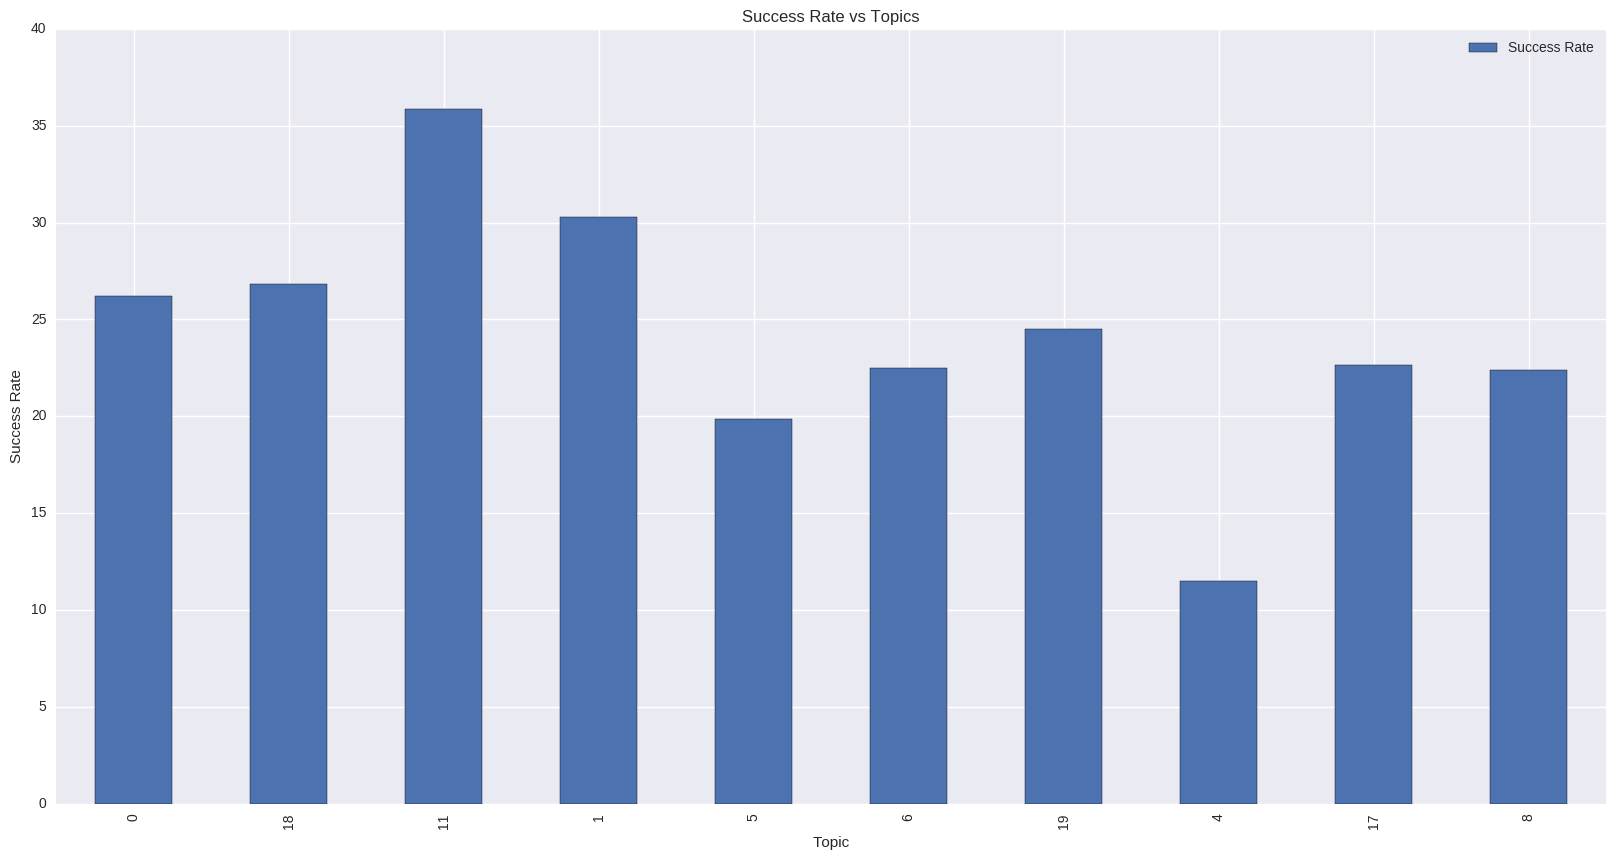

In [22]:
topic_df.plot(kind='bar',y='Success Rate',x='Topic')
plt.xlabel('Topic')
plt.ylabel('Success Rate')
plt.title('Success Rate vs Topics')
plt.show()

In [23]:
## Success correlation with the length of request
train.dropna(inplace=True,axis=0)
train.tail(1)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics,received
4039,N/A,t3_189pw1,"Like the title says, had to pay an unexpected ...","[Request] USA WA. Unexpected bill, couldn't go...",572.314942,0.0,523,0,20,0,28,"[AskReddit, Drugs, IAmA, LongDistance, Minecra...",3212,8424,Ellebean,1360535063,1360535063,train,8,False


In [24]:
train['request_length'] = [len(x.split()) for x in train['request_text_edit_aware']]
train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,...,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics,received,request_length
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,...,[],0,0,nickylvst,1317852607,1317849007,train,2,False,67
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,...,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,train,14,False,16


In [25]:
length = []
def length_success(topic):    
    max_length = train[train['topics'] == topic]['request_length'].max()
    min_length = train[train['topics'] == topic]['request_length'].min()
    bin_size = (max_length - min_length)/20
    df = train[train['topics'] == topic]
    for i in range(10):
        df_one = df[(df['request_length'] >= min_length) & (df['request_length'] < min_length+bin_size)]
        df_new = df_one[df_one['received'] == True]
        if(len(df_one) == 0):
            df_one = ['a']
        length.append([topic,min_length,min_length+bin_size,float(len(df_new))/len(df_one)])
        min_length = min_length + bin_size

In [26]:
for topic in imp_topics:
    print 'Calculating length probabilities for {} topic..'.format(topic[0])
    length_success(topic[0])

Calculating length probabilities for 0 topic..
Calculating length probabilities for 18 topic..
Calculating length probabilities for 11 topic..
Calculating length probabilities for 1 topic..
Calculating length probabilities for 5 topic..
Calculating length probabilities for 6 topic..
Calculating length probabilities for 19 topic..
Calculating length probabilities for 4 topic..
Calculating length probabilities for 17 topic..
Calculating length probabilities for 8 topic..


In [27]:
df_length = pd.DataFrame(length,columns=['Topic','Lower Bound','Upper Bound','Probability Success'])
df_length.head(5)

,Topic,Lower Bound,Upper Bound,Probability Success
0,0,0,42,0.185286
1,0,42,84,0.235474
2,0,84,126,0.300395
3,0,126,168,0.329032
4,0,168,210,0.292453


In [28]:
df_length.to_csv('LengthCorrelation.csv',sep=',',columns=df_length.columns)

In [29]:
df_length.head(20)

,Topic,Lower Bound,Upper Bound,Probability Success
0,0,0,42,0.185286
1,0,42,84,0.235474
2,0,84,126,0.300395
3,0,126,168,0.329032
4,0,168,210,0.292453
5,0,210,252,0.352941
6,0,252,294,0.393939
7,0,294,336,0.500000
8,0,336,378,0.333333
9,0,378,420,0.250000


In [30]:
topic_points = []
for topic in imp_topics:
    points = []
    df_new = df_length[df_length['Topic'] == topic[0]]
    for i in range(8):    
        points.append(((df_new.iloc[i,1] + df_new.iloc[i,2]/2),df_new.iloc[i,3]))
    topic_points.append(points)

In [31]:
rcParams['figure.figsize'] = 20,10

In [32]:
num_plots = len(topic_points)
print num_plots
print len(imp_topics)

10
10


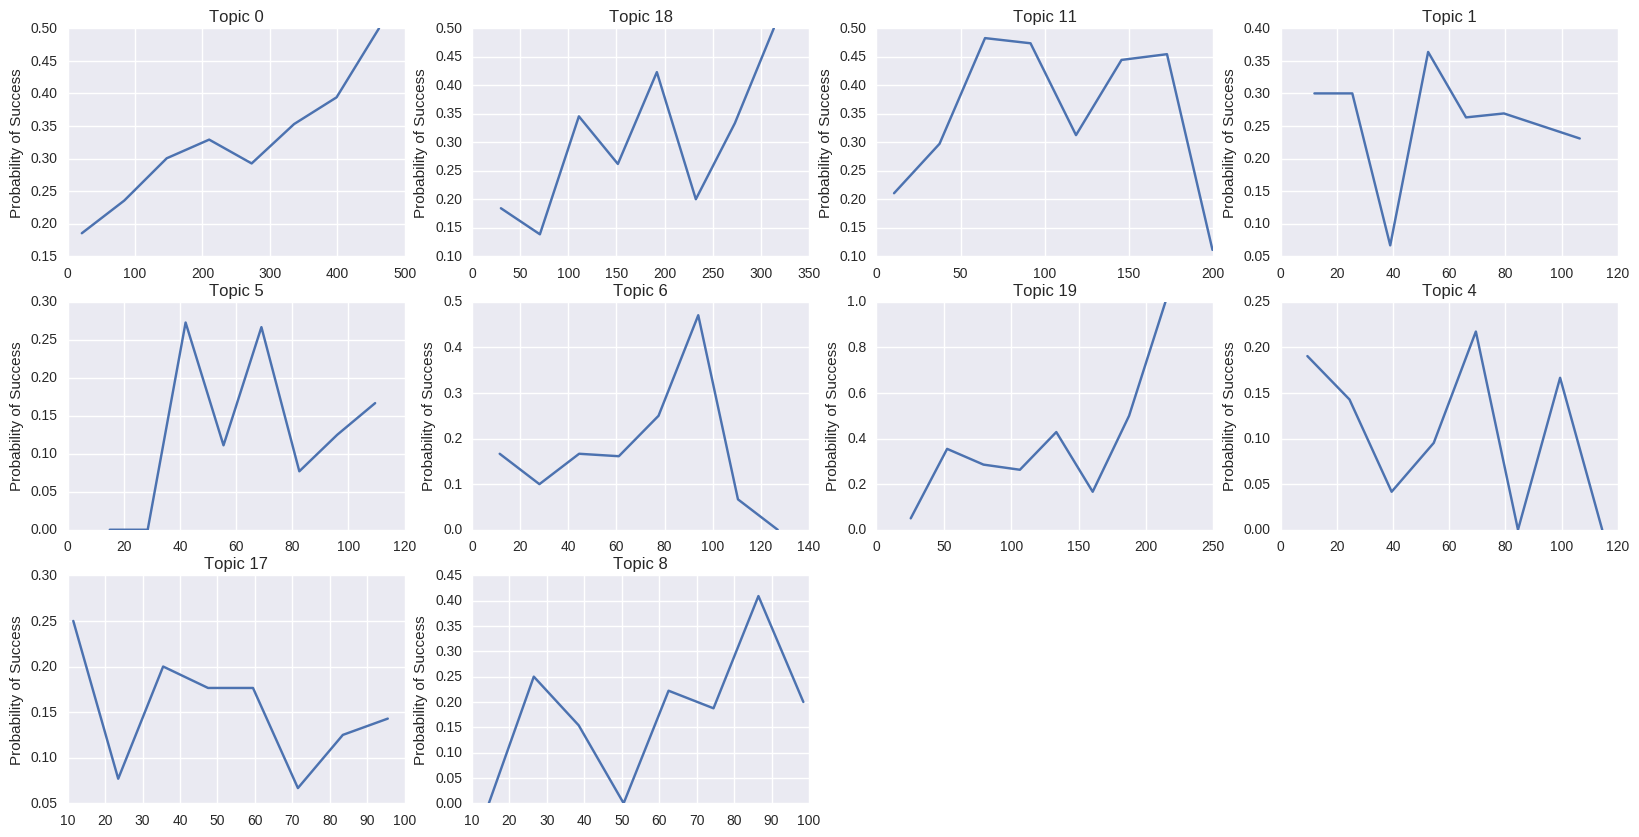

In [33]:
i = 1
for points in topic_points:
    plt.subplot(3,4,i)
    plt.plot([point[0] for point in points],[point[1] for point in points])
    plt.ylabel('Probability of Success')
    plt.title('Topic {}'.format(imp_topics[i-1][0]))
    i += 1
    if i > 10:
        i = 1
plt.show()

In [34]:
## Finding 'Evidentiality' in each of the request

In [35]:
train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,...,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics,received,request_length
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,...,[],0,0,nickylvst,1317852607,1317849007,train,2,False,67
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,...,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,train,14,False,16


In [36]:
import re
regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

In [37]:
evidentiality,i = np.ones((len(train['request_text_edit_aware']))),0
for request in train["request_text_edit_aware"]:
    url = re.findall(regex,request)
    if len(url) <= 0:
        evidentiality[i] = 0
    i += 1

In [38]:
train['evidentiality'] = evidentiality
train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,...,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics,received,request_length,evidentiality
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,...,0,0,nickylvst,1317852607,1317849007,train,2,False,67,0.0
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,...,34,116,fohacidal,1332652424,1332648824,train,14,False,16,0.0


In [39]:
## How evidentiality affects the success rate
total = train[train['evidentiality'] == 1].received
success = len(total[total == True])
print 'Percentage of successful requests with evidence: {}%'.format(round(float(success)*100/len(total),3))

Percentage of successful requests with evidence: 35.192%


In [40]:
total = train[train['evidentiality'] == 0].received
success = len(total[total == True])
print 'Percentage of successful requests without evidence: {}%'.format(round(float(success)*100/len(total),3))

Percentage of successful requests without evidence: 23.794%


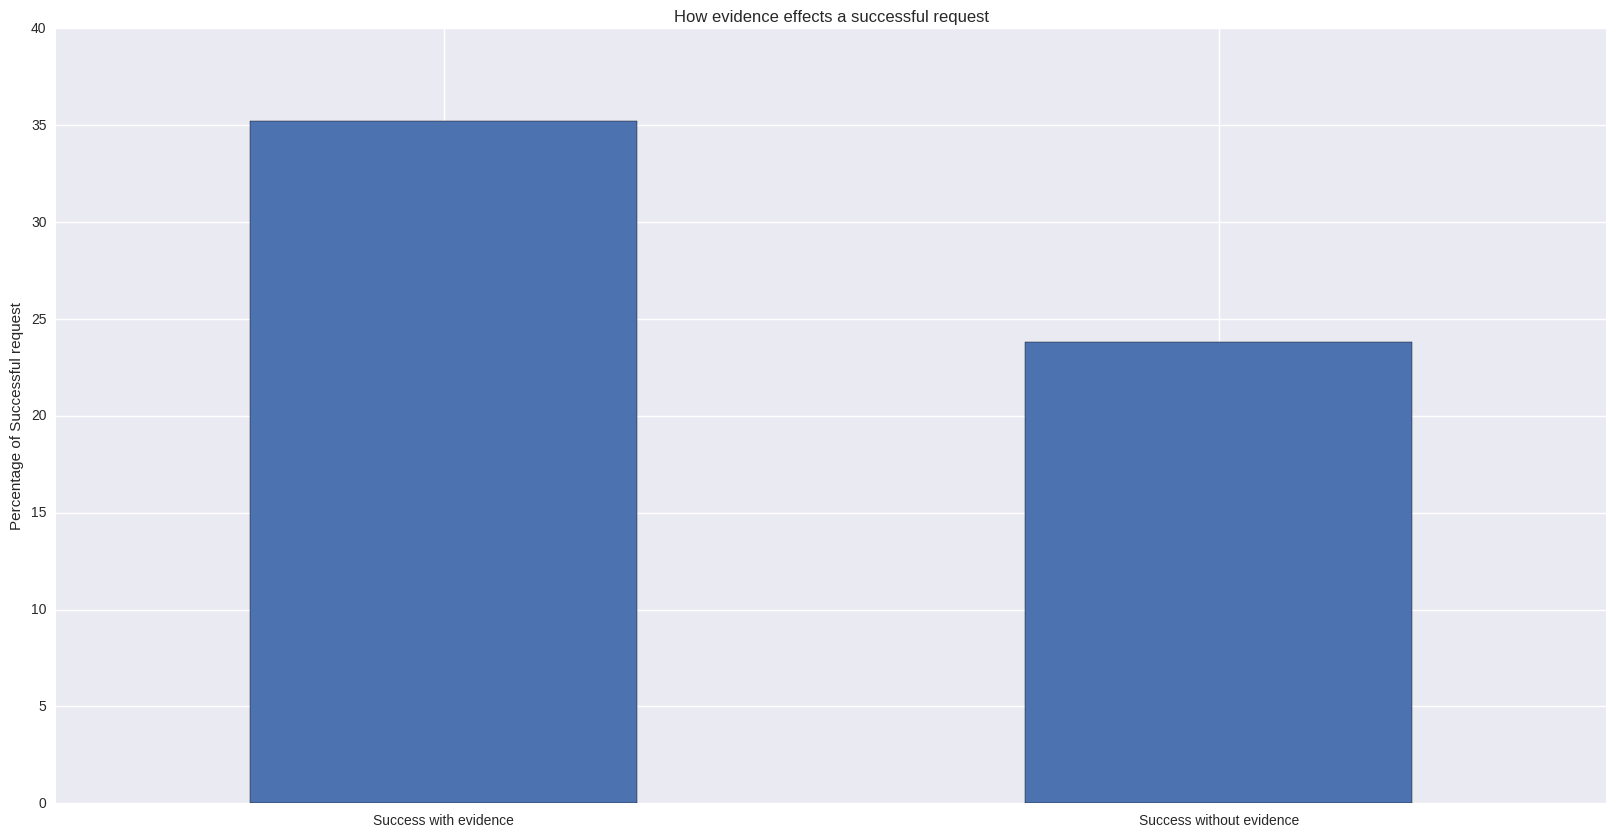

In [41]:
evidence_relation = pd.Series({'Success with evidence':35.192,'Success without evidence':23.794})
evidence_relation.to_csv('evidenceRelation.csv',sep=',')
evidence_relation.plot(kind='bar',rot=0)
plt.ylabel('Percentage of Successful request')
plt.title('How evidence effects a successful request')
plt.show()

In [42]:
reciprocity,i = np.zeros((len(train['request_text_edit_aware']),)),0
regex = 'return the favor|pay it forward|pay it back'
for request in train['request_text_edit_aware']:
    match = re.search(regex,request)
    if match:
        reciprocity[i] = 1
    i += 1

In [43]:
train['reciprocity'] = reciprocity
train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,...,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics,received,request_length,evidentiality,reciprocity
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,...,0,nickylvst,1317852607,1317849007,train,2,False,67,0.0,0.0
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,...,116,fohacidal,1332652424,1332648824,train,14,False,16,0.0,0.0


In [44]:
## Finding percentage of successful request with reciprocity and without it
total = train[train['reciprocity'] == 1].received
success = len(total[total == True])
print 'Percentage of successful requests with reciprocity: {}%'.format(round(float(success)*100/len(total),3))

Percentage of successful requests with reciprocity: 30.058%


In [45]:
total = train[train['reciprocity'] == 0].received
success = len(total[total == True])
print 'Percentage of successful requests with reciprocity: {}%'.format(round(float(success)*100/len(total),3))

Percentage of successful requests with reciprocity: 23.8%


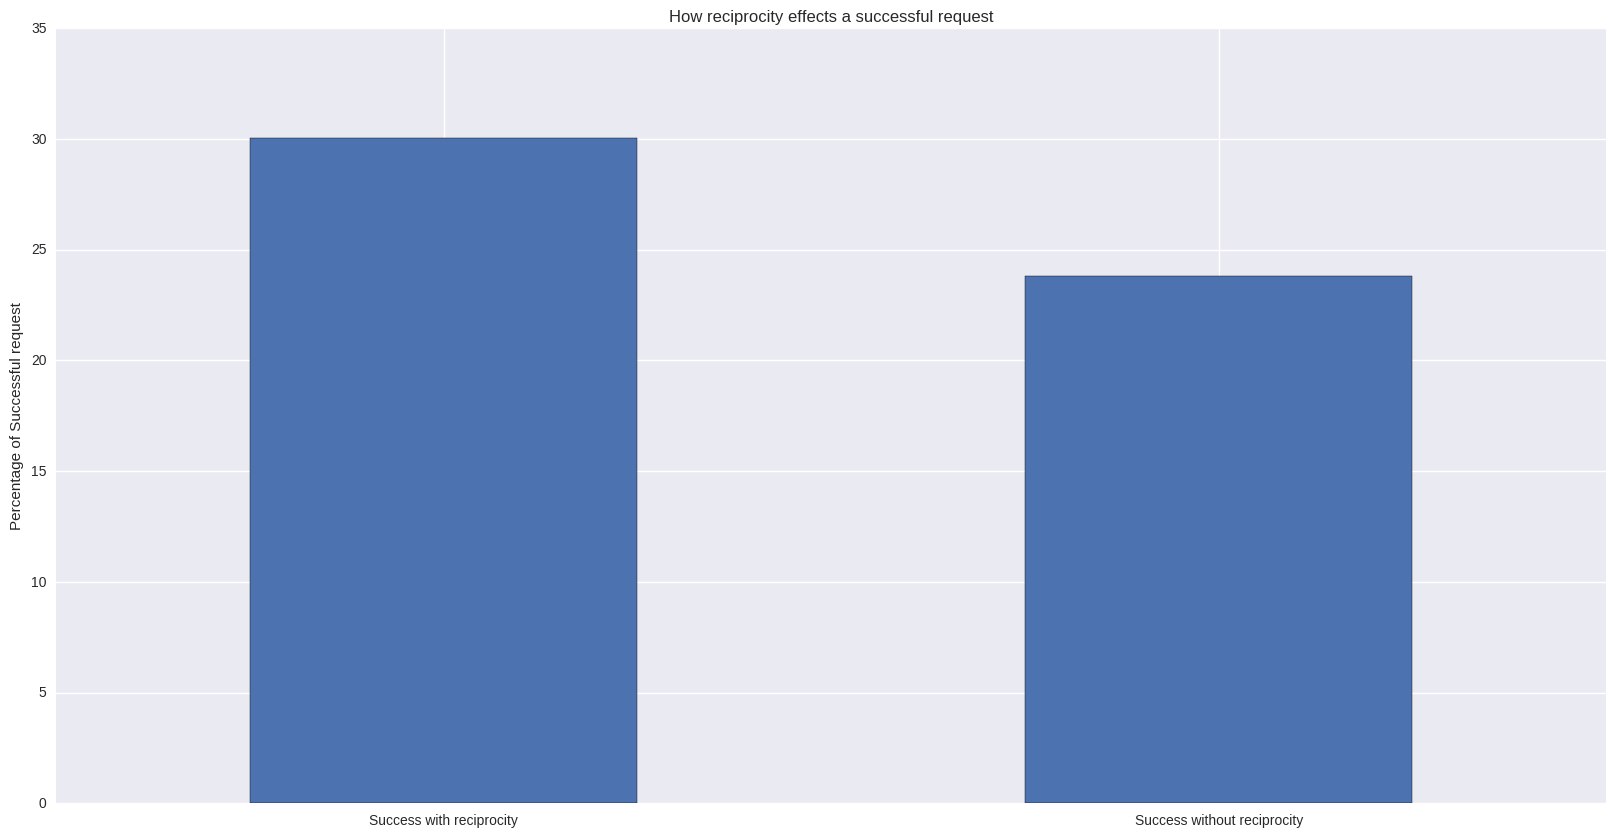

In [46]:
reciprocity_relation = pd.Series({'Success with reciprocity':30.058,'Success without reciprocity':23.8})
reciprocity_relation.to_csv('reciprocity_relation.csv',sep=',')
reciprocity_relation.plot(kind='bar',rot=0)
plt.ylabel('Percentage of Successful request')
plt.title('How reciprocity effects a successful request')
plt.show()

### Training data with the new found features

In [47]:
train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,...,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics,received,request_length,evidentiality,reciprocity
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,...,0,nickylvst,1317852607,1317849007,train,2,False,67,0.0,0.0
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,...,116,fohacidal,1332652424,1332648824,train,14,False,16,0.0,0.0


In [48]:
n_train_examples = train.shape[0]
print n_train_examples

4040


In [49]:
for i in range(topics.shape[1]):
    train['request_text_topic_{}'.format(i)] = topics[:n_train_examples,i]
train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,...,request_text_topic_10,request_text_topic_11,request_text_topic_12,request_text_topic_13,request_text_topic_14,request_text_topic_15,request_text_topic_16,request_text_topic_17,request_text_topic_18,request_text_topic_19
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,...,0.0,0.0,0.0,0.010389,0.000000,0.0,0.0,0.013289,0.0,0.000000
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,...,0.0,0.0,0.0,0.000000,0.135888,0.0,0.0,0.000000,0.0,0.024505


In [50]:
## Changing the "giver_username" column to 0/1

train.giver_username_if_known = train.giver_username_if_known.map({'N/A':0})
train.giver_username_if_known.fillna(1,inplace=True)

In [51]:
train.giver_username_if_known.unique()

array([ 0.,  1.])

In [52]:
train.drop(labels=[i for i in train.columns if train[i].dtype == 'object'],axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4039
Data columns (total 37 columns):
giver_username_if_known                               4040 non-null float64
requester_account_age_in_days_at_request              4040 non-null float64
requester_days_since_first_post_on_raop_at_request    4040 non-null float64
requester_number_of_comments_at_request               4040 non-null int64
requester_number_of_comments_in_raop_at_request       4040 non-null int64
requester_number_of_posts_at_request                  4040 non-null int64
requester_number_of_posts_on_raop_at_request          4040 non-null int64
requester_number_of_subreddits_at_request             4040 non-null int64
requester_upvotes_minus_downvotes_at_request          4040 non-null int64
requester_upvotes_plus_downvotes_at_request           4040 non-null int64
unix_timestamp_of_request                             4040 non-null int64
unix_timestamp_of_request_utc                         4040 non-null int64

In [53]:
train_copy = train.copy()
train_copy.pop('topics')
y = train.pop('received')
print train_copy.shape,y.shape

(4040, 36) (4040,)


In [54]:
y = train_copy.pop('received')

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

In [56]:
rfc = RandomForestClassifier(n_estimators=100)
linear = LogisticRegression()

In [57]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_copy,y,test_size=0.3,random_state=7)

In [58]:
print X_train.shape,y_train.shape

(2828, 35) (2828,)


In [59]:
rfc.fit(X_train,y_train)
linear.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
test_rfc = rfc.predict_proba(X_test.values)
test_linear  = linear.predict_proba(X_test.values)
print test_linear.shape,test_rfc.shape

(1212, 2) (1212, 2)


No Significant improvement on using the new features. The credibility of the new features that are added needs to be determined.

## Narratives

In [61]:
data.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type,topics
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,0,[],0,0,nickylvst,1317852607,1317849007,train,2
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,12,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,train,14


In [62]:
narrative = {'Money': 'money now broke week until time last \
day when today tonight paid next first night after tomorrow \
month while account before long Friday rent buy bank still \
bills bills ago cash due due soon past never paycheck check \
spent years poor till yesterday morning dollars financial \
hour bill evening credit budget loan bucks deposit dollar \
current payed'.split(),'Job':'work job paycheck unemployment\
interview fired employment hired hire'.split(),'Student':'college\
student school roommate studying university finals semester class\
study project dorm tuition'.split(),'Family':'family mom wife parents\
mother hus- band dad son daughter father parent mum'.split(),'Craving':'friend \
girlfriend craving birthday boyfriend celebrate party game games movie\
date drunk beer celebrating invited drinks crave wasted invite'.split()}

In [63]:
request_narrative = []
narration = []
for request in data['request_text_edit_aware']:
    word_count = {'Money':0,'Job':0,'Student':0,'Family':0,'Craving':0}
    n = 0
    for word in request.split():
        for lexicon in narrative:
            if word in narrative[lexicon]:
                word_count[lexicon] += 1
    for lexicon in word_count:
        n += word_count[lexicon]
    request_narrative.append(word_count)
    try:
        narration.append(float(n)/len(request.split()))
    except:
        narration.append(0)

In [64]:
data['narrative'] = narration

## Dependency Parsing Using Stanford Parser

In [68]:
data_train.head(2)

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,data_type
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.0000,0.0,0,0,0,0,0,[],0,0,nickylvst,1317852607,1317849007,train
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.1111,0.0,0,0,15,0,12,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,train


In [69]:
from nltk.parse.stanford import StanfordDependencyParser
import string

In [70]:
path_to_jar = '../../../Downloads/stanford-parser-full-2014-08-27/stanford-parser.jar'
path_to_models_jar = '../../../Downloads/stanford-parser-full-2014-08-27/stanford-parser-3.4.1-models.jar'

In [71]:
dependency_parser = StanfordDependencyParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)

In [72]:
def dep_parse(phrase):
    words = [word for word in set(word_tokenize(phrase)) if word not in string.punctuation]
    result = dependency_parser.raw_parse(phrase)
    dep = result.next()
    if dep == None:
        return ''
    triplet = list(dep.triples())
    if triplet == None:
        return ''
    parse = []
    for i in triplet:
        try:
            parse.append("{}({}-{}, {}-{})".format(i[1],i[0][0],words.index(i[0][0])+1,i[2][0],words.index(i[2][0])+1))
        except:
            pass
    return parse

In [73]:
from nltk.tokenize import word_tokenize

In [74]:
import nltk.data
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')

In [79]:
## DON'T RUN UNTIL REQUIRED
text_documents,i = [],2501
for text in data_train.iloc[2501:,2]:
    i += 1
    parsed_sents = {}
    try:
        parsed_sents['text'] = text
        parsed_sents['sentences'] = [sents for sents in np.asarray(tokenizer.tokenize(text)) if len(sents.split()) > 1]
        temp = []
        for sentence in parsed_sents['sentences']:
            try:
                temp.append(dep_parse(sentence))
            except:
                pass
        parsed_sents['parses'] = temp
    except:
        print text
        break
    text_documents.append(parsed_sents)
    print '{} requests parsed...'.format(i)
    if i%100 == 0:
        %store text_documents >> test_documents_new.py

2502 requests parsed...
2503 requests parsed...
2504 requests parsed...
2505 requests parsed...
2506 requests parsed...
2507 requests parsed...
2508 requests parsed...
2509 requests parsed...
2510 requests parsed...
2511 requests parsed...
2512 requests parsed...
2513 requests parsed...
2514 requests parsed...
2515 requests parsed...
2516 requests parsed...
2517 requests parsed...
2518 requests parsed...
2519 requests parsed...
2520 requests parsed...
2521 requests parsed...
2522 requests parsed...
2523 requests parsed...
2524 requests parsed...
2525 requests parsed...
2526 requests parsed...
2527 requests parsed...
2528 requests parsed...
2529 requests parsed...
2530 requests parsed...
2531 requests parsed...
2532 requests parsed...
2533 requests parsed...
2534 requests parsed...
2535 requests parsed...
2536 requests parsed...
2537 requests parsed...
2538 requests parsed...
2539 requests parsed...
2540 requests parsed...
2541 requests parsed...
2542 requests parsed...
2543 requests pa

In [82]:
%store text_documents >> test_doc_final.py

Writing 'text_documents' (list) to file 'test_doc_final.py'.


In [85]:
from test_documents_new import TEST_DOCUMENT

In [86]:
print len(TEST_DOCUMENT)

99


## Finding Redundancy in requests using Cosine Similarity

In [ ]:
def statistical_sim(sent1, sent2):
    '''
    Statistical similarity between sentences
    based on the cosine method
    Returns: float (the cosine similarity b/w sent1 and sent2)
    '''
    sent_token1 = Counter(sent1)
    sent_token2 = Counter(sent2)

    intxn = set(sent_token1) & set(sent_token2)
    numerator = sum([sent_token1[x] * sent_token2[x] for x in intxn])

    mod1 = sum([sent_token1[x]**2 for x in sent_token1.keys()])
    mod2 = sum([sent_token2[x]**2 for x in sent_token2.keys()])
    denominator = sqrt(mod1)*sqrt(mod2)

    if not denominator:
        return 0.0

    return float(numerator)/denominator

In [ ]:
## Sanity check for statistical similarity
sent1 = 'Hello my name is Najeeb Khan'
sent2 = 'Hello my name is Najeeb Khan'
statistical_sim(sent1,sent2)

In [ ]:
data_train.head(2)

In [ ]:
i = 0
similarity = []
for request1 in data_train['request_text_edit_aware']:
    cosine_sim = []
    for request2 in data_train['request_text_edit_aware']:
        if request1 != request2:
            cosine_sim.append(statistical_sim(request1,request2))
    similarity.append([np.argmax(np.asarray(cosine_sim)),np.max(np.asarray(cosine_sim))])
    i += 1
    if i%100 == 0:
        %store similarity >> similarity.py
        print 'Finding similarity in request {}'.format(i)

In [ ]:
data_train['similarity'] = similarity

In [ ]:
data_train.head(2)

In [ ]:
##Saving all the dataframes to .csv format
data_train.to_json(path_or_buf='../../Dataset/Random Acts Of Pizza/data_train.csv',orient='columns')